# Step 0: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Import data

In [3]:
file = r"C:\Users\-\Documents\GitHub\Learning_Projects\data\Bank_Customer_retirement.csv"
df = pd.read_csv(file)

In [11]:
print(df)

           Age  401K Savings  Retire
0    39.180417   322349.8740       0
1    56.101686   768671.5740       1
2    57.023043   821505.4718       1
3    43.711358   494187.4850       0
4    54.728823   691435.7723       1
..         ...           ...     ...
495  46.678128   704243.0776       1
496  43.545007   483175.9998       0
497  46.476724   354919.1987       0
498  50.903631   639789.9219       1
499  38.590586   491310.0096       0

[500 rows x 3 columns]


# Step 2: Visualize the Data

sns.pairplot(df, hue='Retire',vars=['Age','401K Savings'])

<AxesSubplot:xlabel='Retire', ylabel='count'>

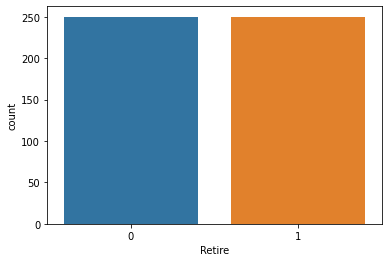

In [13]:
sns.countplot(df.Retire, label='count')

In [14]:
df = df.drop('Customer ID',axis=1)

KeyError: "['Customer ID'] not found in axis"

<AxesSubplot:>

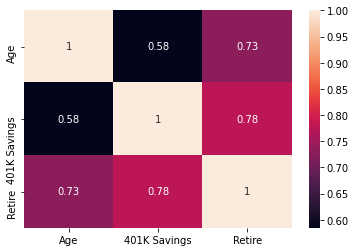

In [15]:
sns.heatmap(df.corr(),annot=True)

# Step 3: Model training 

In [20]:
x_data = df.iloc[:,0:2].copy()
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           500 non-null    float64
 1   401K Savings  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [69]:
Y_data = df['Retire'].copy()
Y_data

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, Y_data, test_size=0.2, random_state=5)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [72]:
from sklearn.svm import  SVC
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
# Scale the Data for better Perfomance
min_train = X_train.min()
range_train = (X_train - min_train).max()
x_train_scaled = (X_train - min_train)/range_train

<AxesSubplot:xlabel='401K Savings', ylabel='Age'>

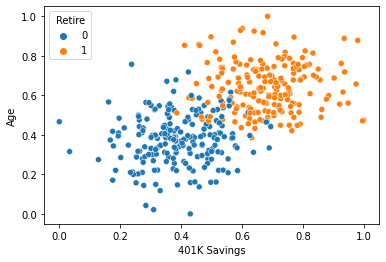

In [74]:
sns.scatterplot(x = x_train_scaled['401K Savings'], y = x_train_scaled['Age'], hue =y_train)

In [75]:
x_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled= scaler.transform(X_test)

In [78]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = ['Age','401K Savings']

In [79]:
svc_model = SVC(gamma='auto')

In [80]:
svc_model.fit(x_train_scaled, y_train)

SVC(gamma='auto')

In [81]:
y_predict = svc_model.predict(X_test_scaled)

<AxesSubplot:>

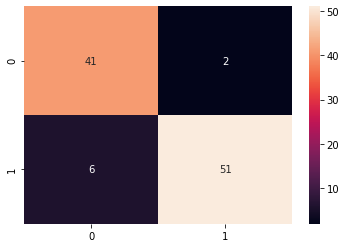

In [65]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot=True)

In [66]:
# Get Model Statistics
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        57

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

